# **Spam Message Classification using LSTM**

### 1.Import the Necessary Libraries

In [10]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### **2. Reading the .csv dataset**

In [5]:
data=pd.read_csv("spam1.csv",encoding="latin")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

### **3. Drop the unnamed Columns**

In [12]:
data=data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

### **4. Renaming Column names sensible**

In [13]:
data=data.rename(
{
    "v1":"Category",
    "v2":"Message"
},
    axis=1
)

In [14]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 5. Check for null values in dataset

In [15]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### 6.Creating a new Field to store the Message Lengths

In [17]:
data["Message Length"]=data["Message"].apply(len)

### 7. Histogram Inference of Message Lengths of Spam and Non-spam messages

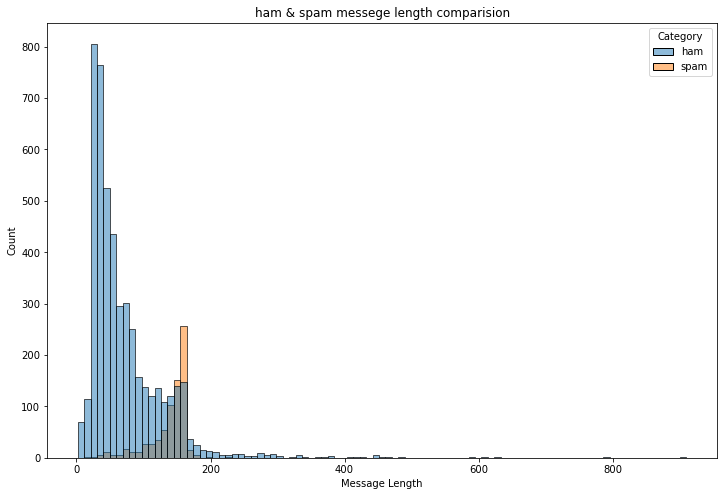

In [18]:
fig=plt.figure(figsize=(12,8))
sns.histplot(
    x=data["Message Length"],
    hue=data["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [19]:
ham_desc=data[data["Category"]=="ham"]["Message Length"].describe()
spam_desc=data[data["Category"]=="spam"]["Message Length"].describe()

print("Ham Messege Length Description:\n",ham_desc)
print("************************************")
print("Spam Message Length Description:\n",spam_desc)

Ham Messege Length Description:
 count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: Message Length, dtype: float64
************************************
Spam Message Length Description:
 count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: Message Length, dtype: float64


In [20]:
data.describe(include="all")

,Category,Message,Message Length
count,5572,5572,5572.000000
unique,2,5169,NaN
top,ham,"Sorry, I'll call later",NaN
freq,4825,30,NaN
mean,NaN,NaN,80.118808
std,NaN,NaN,59.690841
min,NaN,NaN,2.000000
25%,NaN,NaN,36.000000
50%,NaN,NaN,61.000000
75%,NaN,NaN,121.000000


### 8. Visualizing count of messages of Spam and Non Spam

In [21]:
data["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

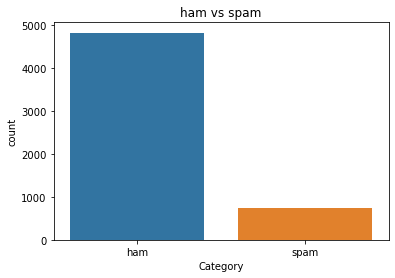

In [22]:
sns.countplot(
    data=data,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [23]:
ham_count=data["Category"].value_counts()[0]
spam_count=data["Category"].value_counts()[1]

total_count=data.shape[0]

print("Ham contains:{:.2f}% of total data.".format(ham_count/total_count*100))
print("Spam contains:{:.2f}% of total data.".format(spam_count/total_count*100))

Ham contains:86.59% of total data.
Spam contains:13.41% of total data.


### 9. Undersampling to Genralize Model and Balance Spam and Ham quantities in dataset

In [25]:
minority_len=len(data[data["Category"]=="spam"])
majority_len=len(data[data["Category"]=="ham"])
minority_indices=data[data["Category"]=="spam"].index
majority_indices=data[data["Category"]=="ham"].index
random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)

undersampled_indices=np.concatenate([minority_indices,random_majority_indices])
df=data.loc[undersampled_indices]
df=df.sample(frac=1)
df=df.reset_index()
df=df.drop(
    columns=["index"],
)

In [26]:
df.shape

(1494, 3)

In [27]:
df["Category"].value_counts()

ham     747
spam    747
Name: Category, dtype: int64

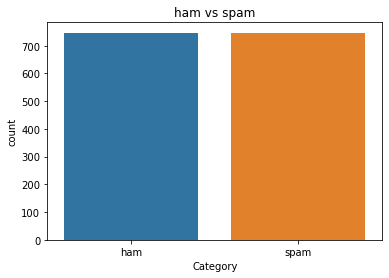

In [29]:
sns.countplot(
    data=df,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [30]:
df.head()

,Category,Message,Message Length
0,ham,Ay wana meet on sat?Ì_ wkg on sat?,34
1,ham,Are you happy baby ? Are you alright ? Did you...,154
2,ham,ÌÏ got wat to buy tell us then Ì_ no need to c...,59
3,spam,You are a winner you have been specially selec...,159
4,spam,Free Top ringtone -sub to weekly ringtone-get ...,114


### 10. Binary Encoding of Spam and Ham Categories

In [31]:
df["Label"]=df["Category"].map(
    {
        "ham":0,
        "spam":1
    }
)

In [32]:
df.head()

,Category,Message,Message Length,Label
0,ham,Ay wana meet on sat?Ì_ wkg on sat?,34,0
1,ham,Are you happy baby ? Are you alright ? Did you...,154,0
2,ham,ÌÏ got wat to buy tell us then Ì_ no need to c...,59,0
3,spam,You are a winner you have been specially selec...,159,1
4,spam,Free Top ringtone -sub to weekly ringtone-get ...,114,1


### 11. Import Necessary Libraries to perform Word Tokenization

In [48]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

In [49]:
corpus=[]
for message in df["Message"]:
    message=re.sub("[^a-zA-Z]"," ",message)
    message=message.lower()
    message=message.split()
    message=[stemmer.stem(words)
            for words in message
             if words not in set(stopwords.words("english"))
            ]
    message=" ".join(message)
    corpus.append(message)

### 12. Perform One Hot on Corpus

In [50]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=10000

oneHot_doc=[one_hot(words,n=vocab_size)
           for words in corpus
           ]

In [51]:
df["Message Length"].describe()

count    1494.000000
mean      106.235609
std        55.198121
min         2.000000
25%        51.000000
50%       121.000000
75%       153.000000
max       444.000000
Name: Message Length, dtype: float64

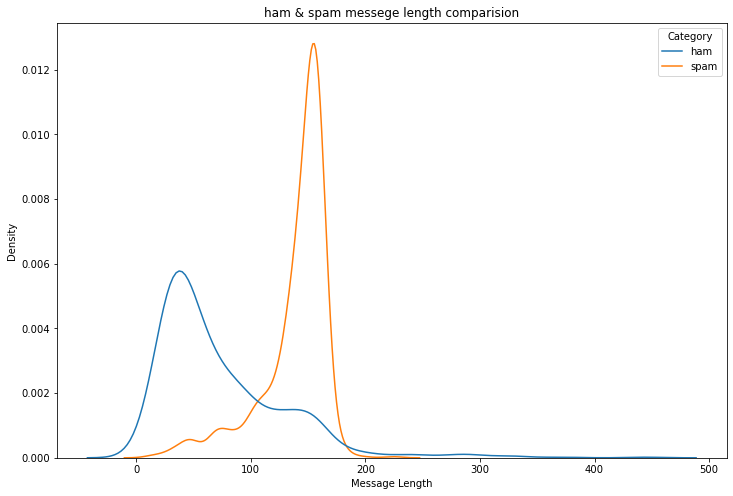

In [52]:
fig=plt.figure(figsize=(12,8))
sns.kdeplot(
    x=df["Message Length"],
    hue=df["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [53]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len=200
embedded_doc=pad_sequences(
    oneHot_doc,
    maxlen=sentence_len,
    padding="pre"
)

In [54]:
extract_features=pd.DataFrame(
    data=embedded_doc
)
target=df["Label"]

In [55]:
df_final=pd.concat([extract_features,target],axis=1)

In [56]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2500,5713,7054,6307,8625,6307,0
1,0,0,0,0,0,0,0,0,0,0,...,3210,4296,4914,8649,1749,4127,1761,4914,4914,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,7959,5462,7331,5163,6443,9391,2826,0
3,0,0,0,0,0,0,0,0,0,0,...,7345,5579,482,1031,7550,7194,2433,5088,9749,1
4,0,0,0,0,0,0,0,0,0,0,...,5407,804,7955,4296,5266,177,804,9767,9713,1


### 13. Splitting Dependent and Independent Variables

In [57]:
X=df_final.drop("Label",axis=1)
y=df_final["Label"]

### 14. Train, test and Validation Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_trainval,X_test,y_trainval,y_test=train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.15
)

In [60]:
X_train,X_val,y_train,y_val=train_test_split(
    X_trainval,
    y_trainval,
    random_state=42,
    test_size=0.15
)

### 15.Building a Sequential Model

In [61]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

In [62]:
model=Sequential()

In [63]:
feature_num=100
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=feature_num,
        input_length=sentence_len
    )
)
model.add(
    LSTM(
    units=128
    )
)

model.add(
    Dense(
        units=1,
        activation="sigmoid"
    )
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,117,377
Trainable params: 1,117,377
Non-trainable params: 0
_________________________________________________________________


In [64]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(
    learning_rate=0.001
    ),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

### 16. Model Fitting

In [65]:
history=model.fit(
    X_train,
    y_train,
    validation_data=(
        X_val,
        y_val
    ),
    epochs=10
)

Epoch 1/10
34/34 [==============================] - 14s 296ms/step - loss: 0.5104 - accuracy: 0.7941 - val_loss: 0.3104 - val_accuracy: 0.8796
Epoch 2/10
34/34 [==============================] - 9s 274ms/step - loss: 0.1382 - accuracy: 0.9601 - val_loss: 0.1809 - val_accuracy: 0.9372
Epoch 3/10
34/34 [==============================] - 9s 276ms/step - loss: 0.0549 - accuracy: 0.9824 - val_loss: 0.1760 - val_accuracy: 0.9319
Epoch 4/10
34/34 [==============================] - 9s 274ms/step - loss: 0.0296 - accuracy: 0.9926 - val_loss: 0.1746 - val_accuracy: 0.9424
Epoch 5/10
34/34 [==============================] - 12s 342ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.1722 - val_accuracy: 0.9424
Epoch 6/10
34/34 [==============================] - 10s 292ms/step - loss: 0.0102 - accuracy: 0.9981 - val_loss: 0.2013 - val_accuracy: 0.9372
Epoch 7/10
34/34 [==============================] - 9s 278ms/step - loss: 0.0082 - accuracy: 0.9981 - val_loss: 0.2380 - val_accuracy: 0.9319
Epo

In [66]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graph_acc(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

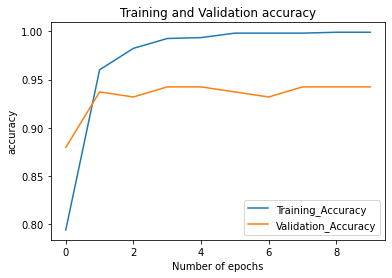

In [67]:
plot_graph_acc('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [68]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

8/8 [==============================] - 1s 89ms/step


In [69]:
model.save('Spam_SMS_classifier.h5')

### 17. Evaluating the Model

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [71]:
score=accuracy_score(y_test,y_pred)
print("Test Score:{:.2f}%".format(score*100))

Test Score:94.22%


array([[117,   6],
       [  7,  95]], dtype=int64)

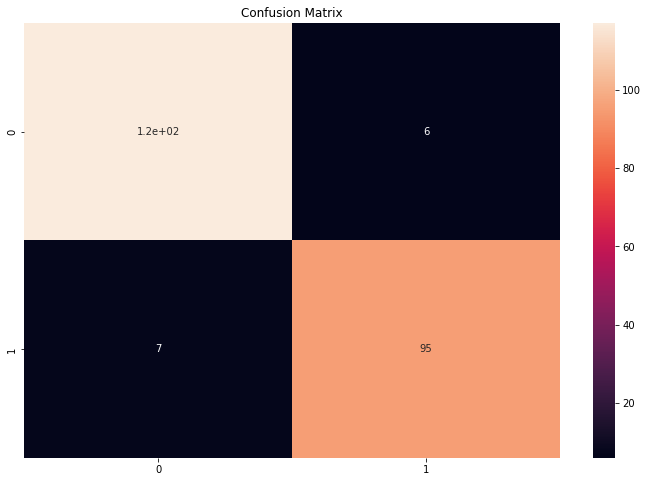

In [72]:
cm=confusion_matrix(y_test,y_pred)
fig=plt.figure(figsize=(12,8))
sns.heatmap(
    cm,
    annot=True,
)
plt.title("Confusion Matrix")
cm

### 18. Function to Test the Model on a Random message

In [73]:
def classify_message(model,message):
    for sentences in message:
        sentences=nltk.sent_tokenize(message)
        for sentence in sentences:
            words=re.sub("[^a-zA-Z]"," ",sentence)
            if words not in set(stopwords.words('english')):
                word=nltk.word_tokenize(words)
                word=" ".join(word)        
    oneHot=[one_hot(word,n=vocab_size)]
    text=pad_sequences(oneHot,maxlen=sentence_len,padding="pre")
    predict=model.predict(text)
    if predict>0.5:
        print("It is a spam")
        print("predict score: ", predict[0][0])
    else:
        print("It is not a spam")
        print("predict score: ", predict[0][0])

In [74]:
message1="I am having my Tests right now. Will call back as soon as possible! Till then be safe wherever you are. Be Alert of any hazard"
message2="Your Rs.8850 welcome bonus is ready to be credited. Download Junglee Rummy now. Claim Bonus on your first deposit prize pool"

In [77]:
classify_message(model,message1)

1/1 [==============================] - 0s 49ms/step
It is not a spam
predict score:  0.29372534


In [78]:
classify_message(model,message2)

1/1 [==============================] - 0s 48ms/step
It is a spam
predict score:  0.9998068
